In [2]:
import numpy as np

from wpg.wpg_uti_wf import plot_intensity_map

from felpy.model.src.top_down import temporal_sampling_requirements, generate_temporal_SASE_pulse, wavefront_to_wavefield
from felpy.model.src.coherent import construct_wavefront
from felpy.model.beamlines.exfel_spb.methods import setup_spb


Frequency Sampling Interval: 6.28e+13 Hz
Temporal Sampling Interval: 1.59e-14 s
Number of Req. Samples: 26.0
Number of Samples:  104
complex128


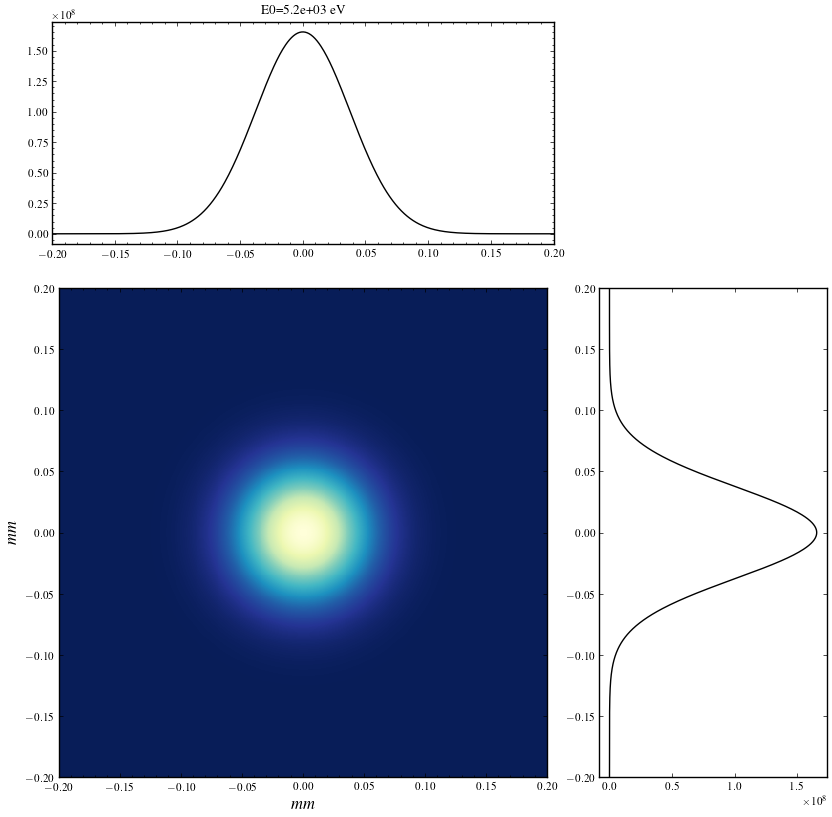

(4.156121310087351e-06, 4.156121310087351e-06)

In [3]:
pulse_time = 100e-15
sigma = 4 
S = 4
Seff = S/sigma

n_samples, sampling_interval_t = temporal_sampling_requirements(pulse_time, VERBOSE = True, S = S)
sampling_interval_w = 1/sampling_interval_t

n_samples *= sigma 

t = np.arange(-pulse_time*S, pulse_time*S, pulse_time/n_samples)

temporal_profile = generate_temporal_SASE_pulse(pulse_time = pulse_time,
                                                n_samples = n_samples,
                                                sigma = sigma,
                                                VERBOSE = False)
print("Number of Samples: ",n_samples)
print(temporal_profile.dtype)
spatial_profile = construct_wavefront(nx = 512, ny = 512,
                                       ekev = 5.2, fwhm = 25e-06, divergence = 1e-06, pulse_duration = pulse_time,
                                     xMin = -200e-06, xMax = 200e-06, yMin = -200e-06, yMax = 200e-06)

wfr = wavefront_to_wavefield(spatial_profile, temporal_profile)

wfr.set_electric_field_representation('f')

plot_intensity_map(wfr)

#wfr.get_beam_size()
wfr.get_divergence()


In [4]:
print(wfr)

Radiation:
	Mesh:
		hvx = 1
		hvy = 0
		hvz = 0
		nSlices = 104
		nvx = 0
		nvy = 0
		nvz = 1
		nx = 512
		ny = 512
		qxMax = 636254.8828125
		qxMin = -638750.0
		qyMax = 636254.8828125
		qyMin = -638750.0
		sliceMax = 5201.305568489801
		sliceMin = 5198.668832128047
		xMax = None
		xMin = None
		yMax = None
		yMin = None
		zCoord = 0.0
		
	Rx = 0.0
	Ry = 0.0
	dRx = 0.0
	dRy = 0.0
	nSlices = 104
	nval = 2
	nx = 512
	ny = 512
	photonEnergy = 5200.0
	wDomain = frequency
	wEFieldUnit = sqrt(J/eV/mm^2)
	wFloatType = float
	wSpace = Q-space
	xCentre = 0.0
	yCentre = 0.0
	
	arrEhor = array of shape (512, 512, 104, 2) // the 2-nd dimension is (re,im)
	arrEver = array of shape (512, 512, 104, 2) // the 2-nd dimension is (re,im)



In [5]:
print(wfr)

Radiation:
	Mesh:
		hvx = 1
		hvy = 0
		hvz = 0
		nSlices = 104
		nvx = 0
		nvy = 0
		nvz = 1
		nx = 512
		ny = 512
		qxMax = 636254.8828125
		qxMin = -638750.0
		qyMax = 636254.8828125
		qyMin = -638750.0
		sliceMax = 5201.305568489801
		sliceMin = 5198.668832128047
		xMax = None
		xMin = None
		yMax = None
		yMin = None
		zCoord = 0.0
		
	Rx = 0.0
	Ry = 0.0
	dRx = 0.0
	dRy = 0.0
	nSlices = 104
	nval = 2
	nx = 512
	ny = 512
	photonEnergy = 5200.0
	wDomain = frequency
	wEFieldUnit = sqrt(J/eV/mm^2)
	wFloatType = float
	wSpace = Q-space
	xCentre = 0.0
	yCentre = 0.0
	
	arrEhor = array of shape (512, 512, 104, 2) // the 2-nd dimension is (re,im)
	arrEver = array of shape (512, 512, 104, 2) // the 2-nd dimension is (re,im)



In [16]:
from felpy.model.beamline import Beamline
from wpg.optical_elements import Drift
from felpy.model.tools import propagation_parameters

tbl = Beamline()
tbl.append(Drift(1), propagation_parameters(1,1,1,1, mode = 'fresnel'))
tbl.propagate(wfr)

b = wfr.get_beam_size()
print(wfr)
#print(wfr.params.Mesh.yMax)



Radiation:
	Mesh:
		hvx = 1
		hvy = 0
		hvz = 0
		nSlices = 104
		nvx = 0
		nvy = 0
		nvz = 1
		nx = 1024
		ny = 1024
		qxMax = None
		qxMin = None
		qyMax = None
		qyMin = None
		sliceMax = 5201.305568489801
		sliceMin = 5198.668832128047
		xMax = 0.00040039138943248533
		xMin = -0.00040039138943248533
		yMax = 0.00040039138943248533
		yMin = -0.00040039138943248533
		zCoord = 1.0
		
	Rx = 1.0
	Ry = 1.0
	dRx = 0.0
	dRy = 0.0
	nSlices = 104
	nval = 2
	nx = 1024
	ny = 1024
	photonEnergy = 5200.0
	wDomain = frequency
	wEFieldUnit = sqrt(J/eV/mm^2)
	wFloatType = float
	wSpace = R-space
	xCentre = 0.0
	yCentre = 0.0
	
	arrEhor = array of shape (1024, 1024, 104, 2) // the 2-nd dimension is (re,im)
	arrEver = array of shape (1024, 1024, 104, 2) // the 2-nd dimension is (re,im)



In [1]:
print(a,b)
np.tan((b[0][0]-a[0][0])/1)

NameError: name 'a' is not defined

In [8]:
from felpy.model.beamlines.exfel_spb.methods import setup_spb
from felpy.model.tools import propagation_parameters
spb = setup_spb(parameter_file = "/gpfs/exfel/data/user/guestt/FELpy/felpy/data/params/spb-sfx_nkb_FAST.json", theta_KB = 5e-03, theta_HOM = 3.5e-03) #bl = spb.bl
spb.edit_propagation_parameters("d1", propagation_parameters(1,1,1,1,mode = 'fraunhofer'))
#spb.remove_element("d1")
#spb.rebuild()
bl = spb.bl 

## EXEC


Initialising Single Particle Beamline
List of Elements: ['d1', 'HOM1', 'd2', 'HOM2', 'd3', 'NKB_PSlit', 'd4', 'NHE_error', 'NHE', 'd5', 'NVE_error', 'NVE']


Attention!!! The "total" polarization behavior sometimes strange. Use "horizontal" or "vertical".


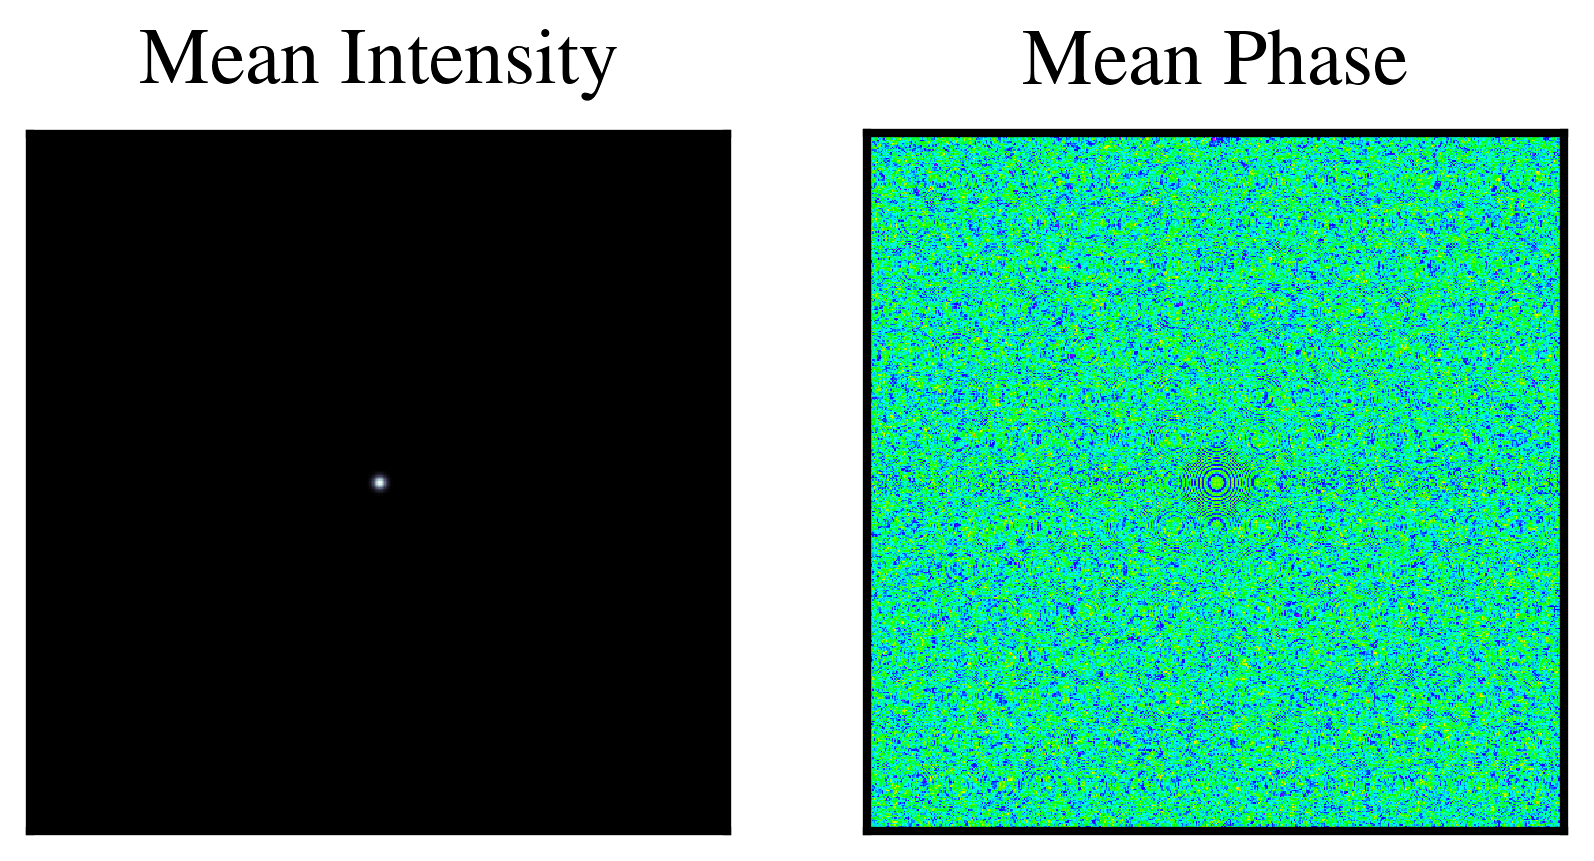

None
d1


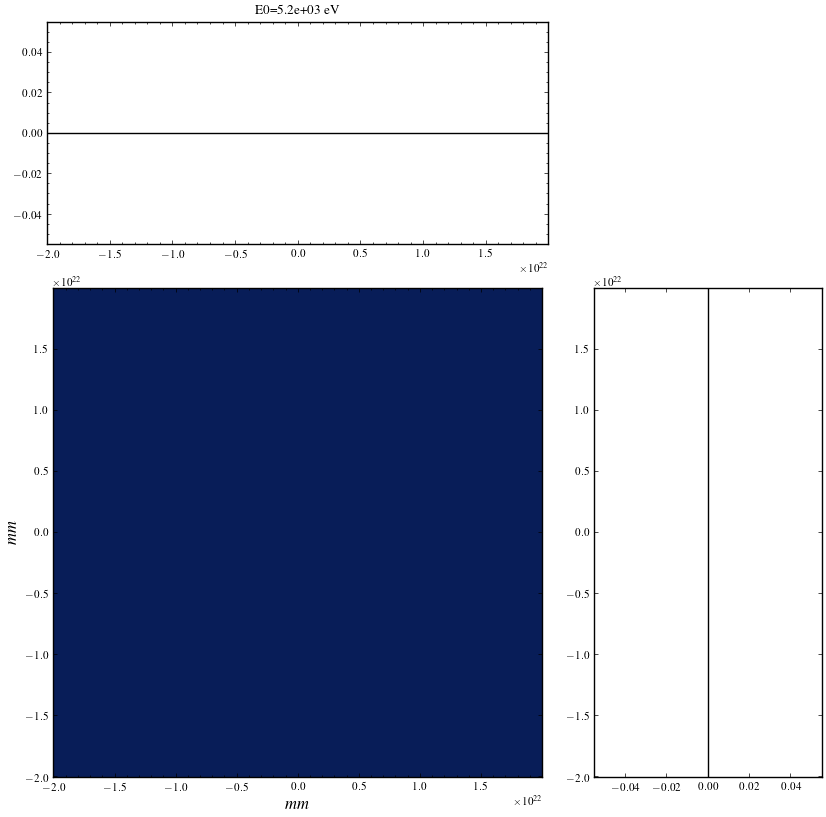

HOM1


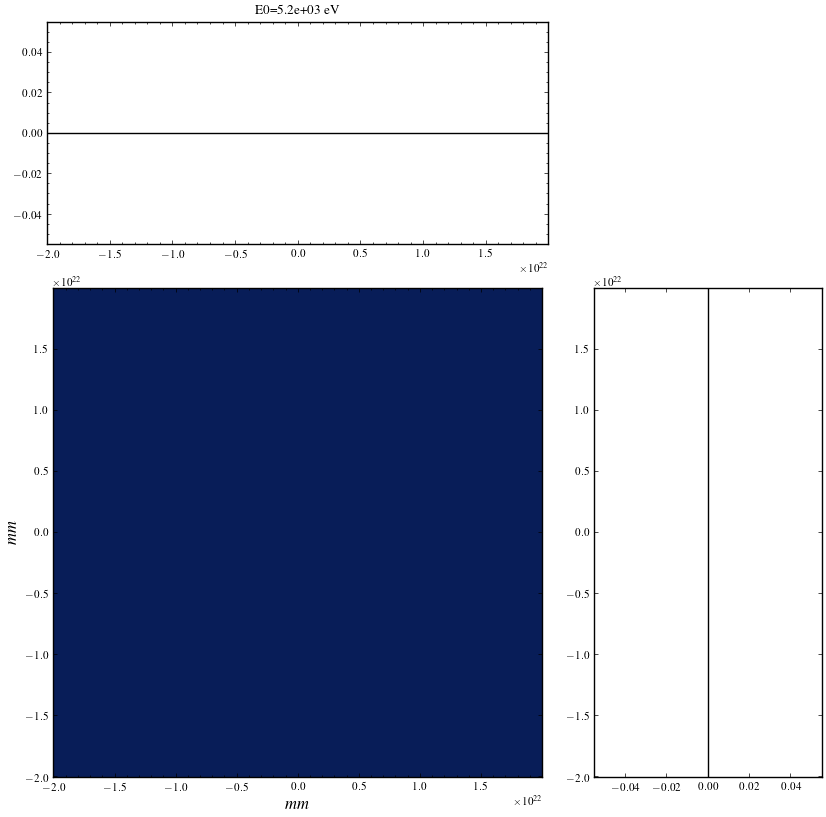

d2


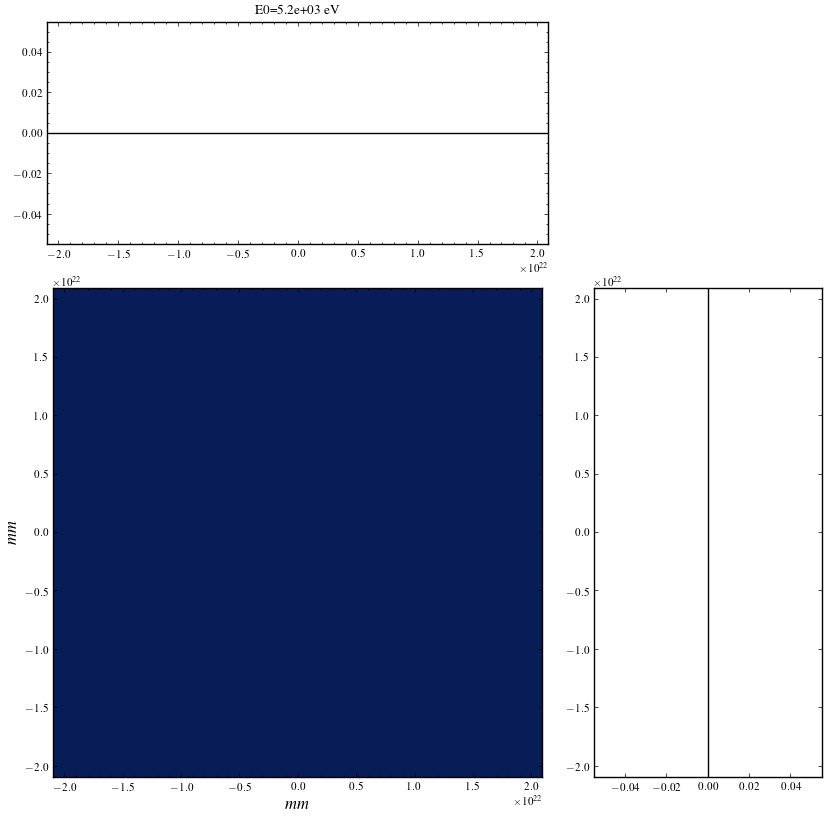

HOM2


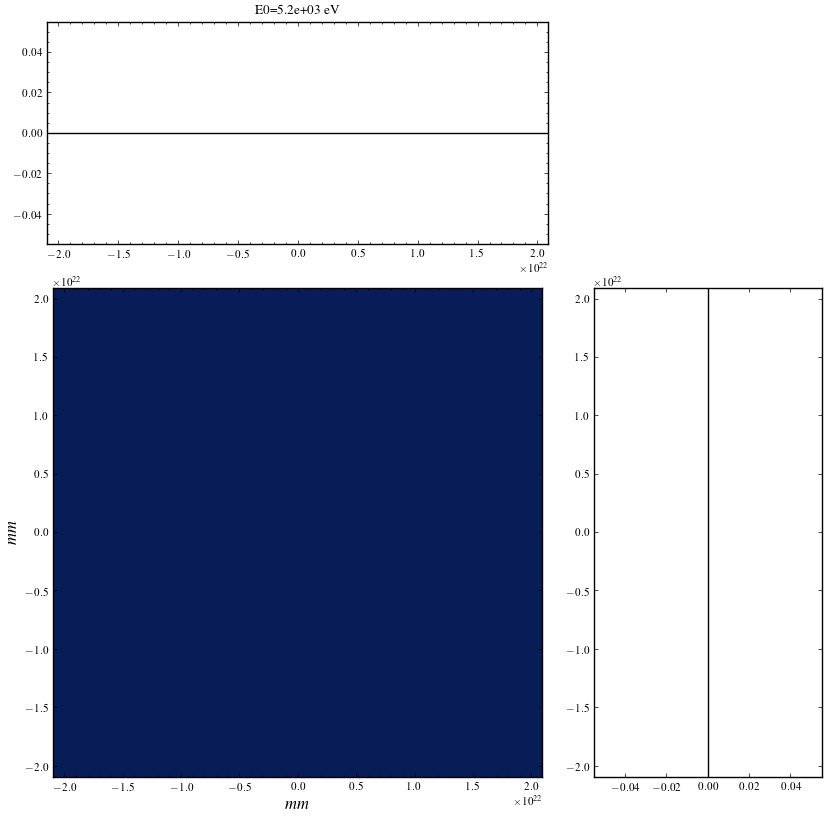

d3


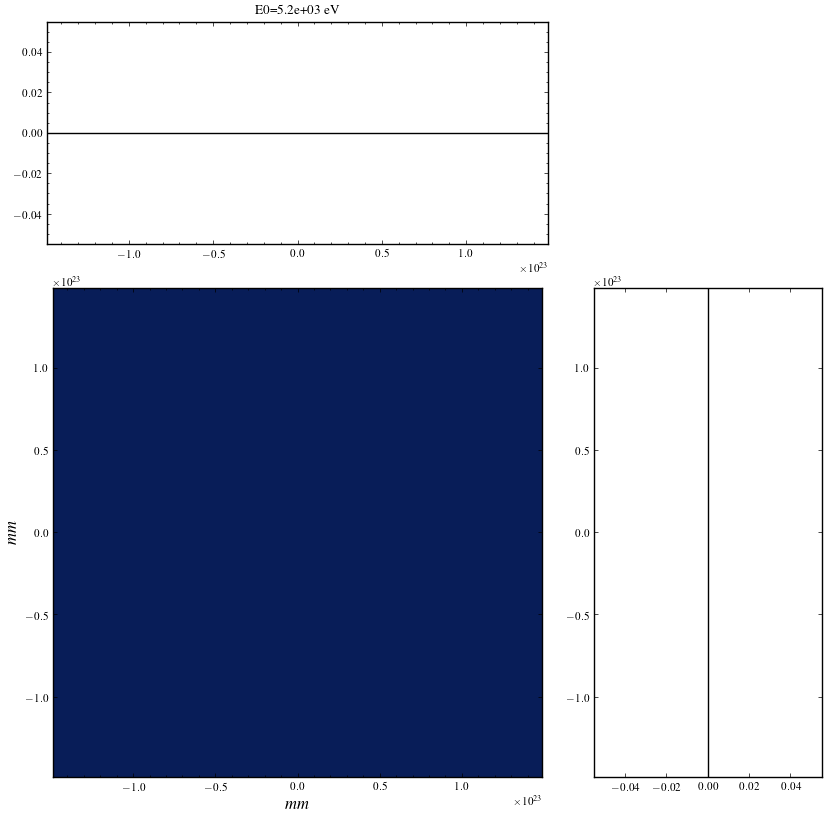

NKB_PSlit


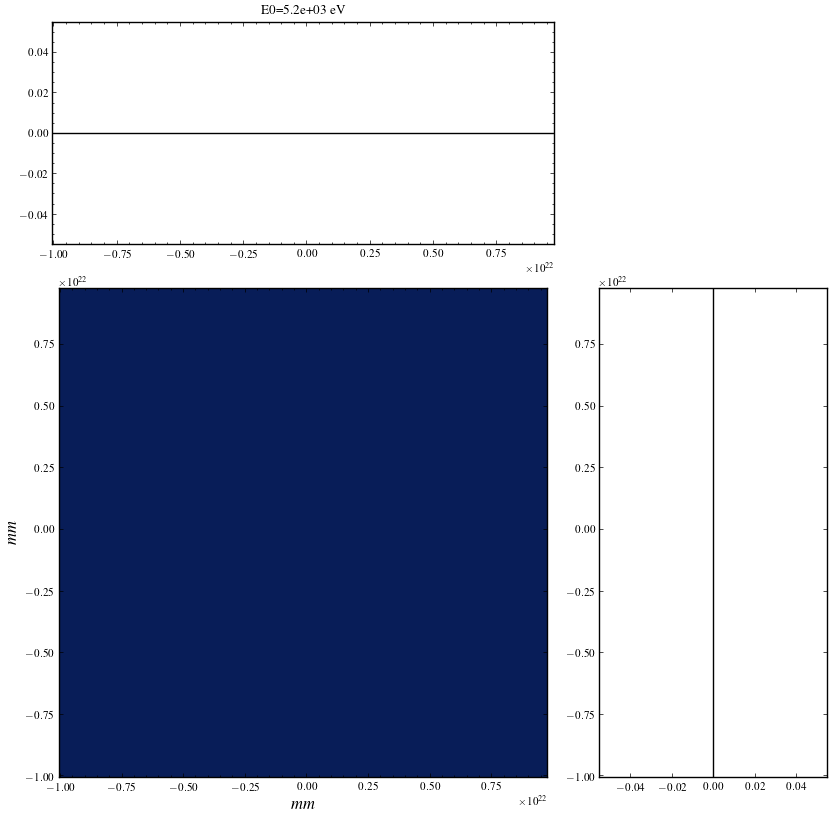

d4


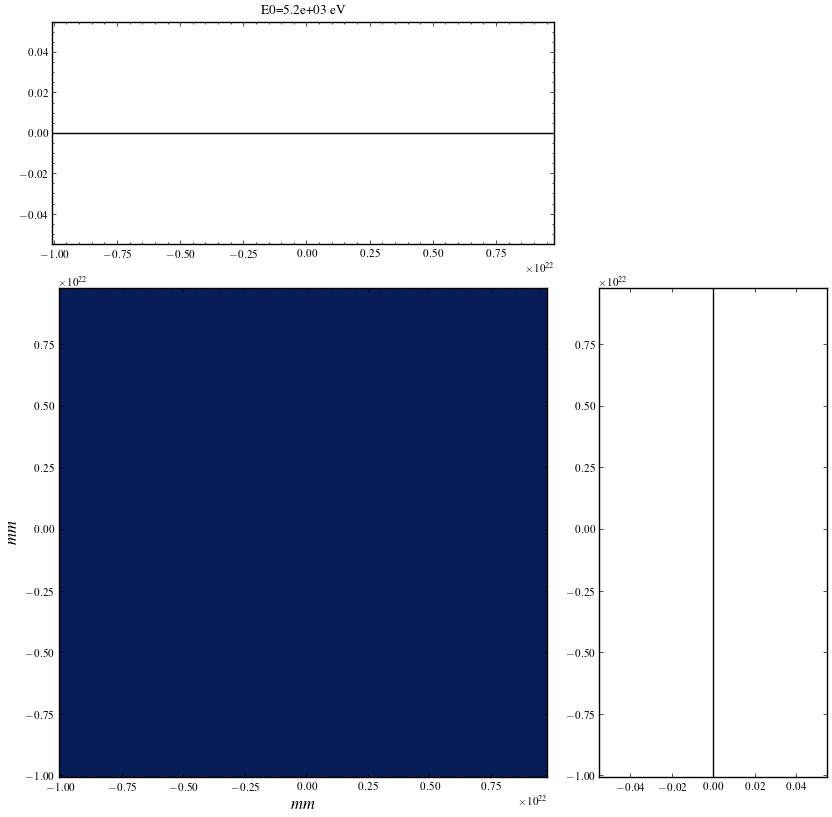

NHE_error


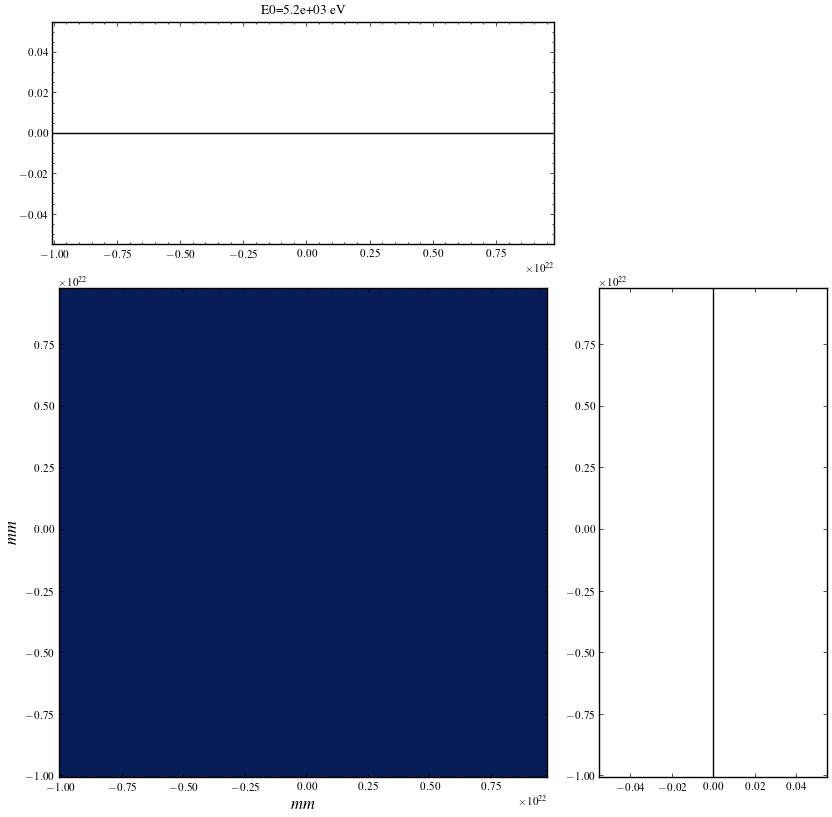

NHE


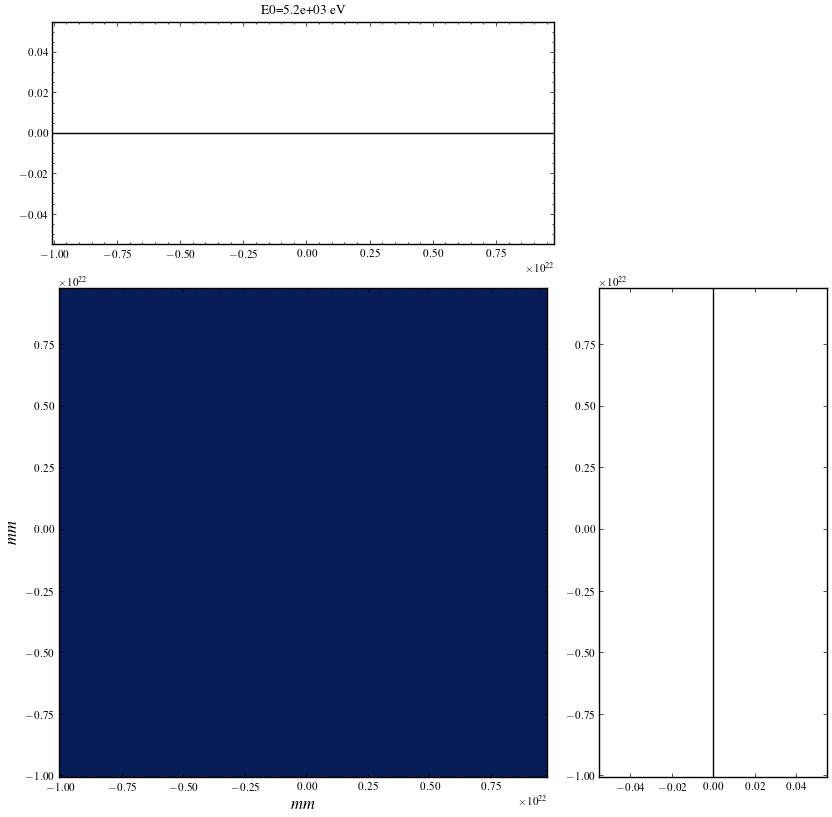

d5


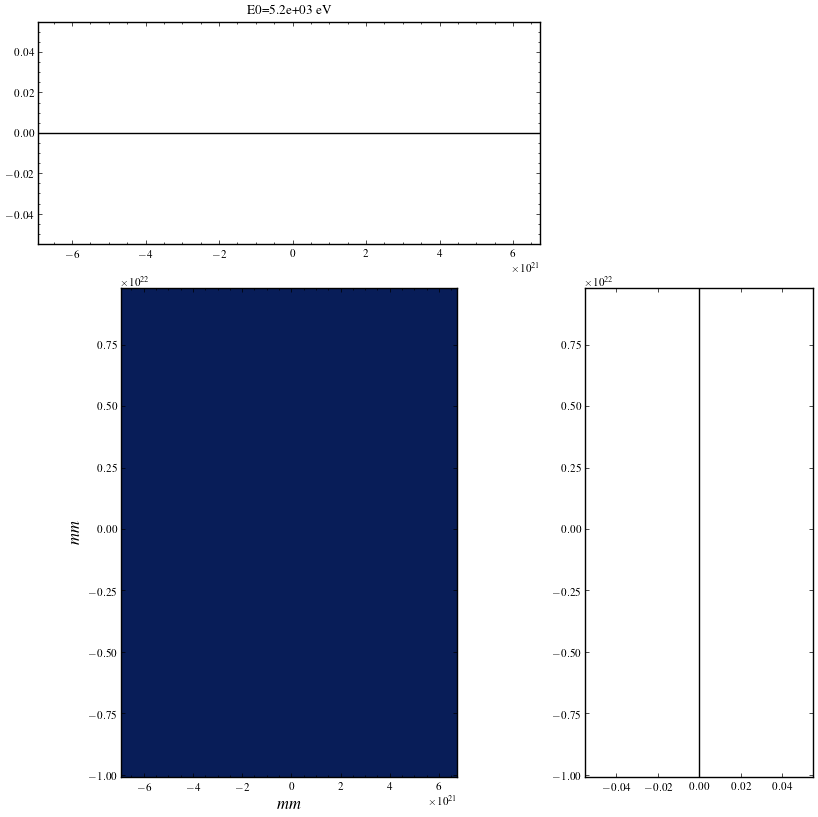

NVE_error


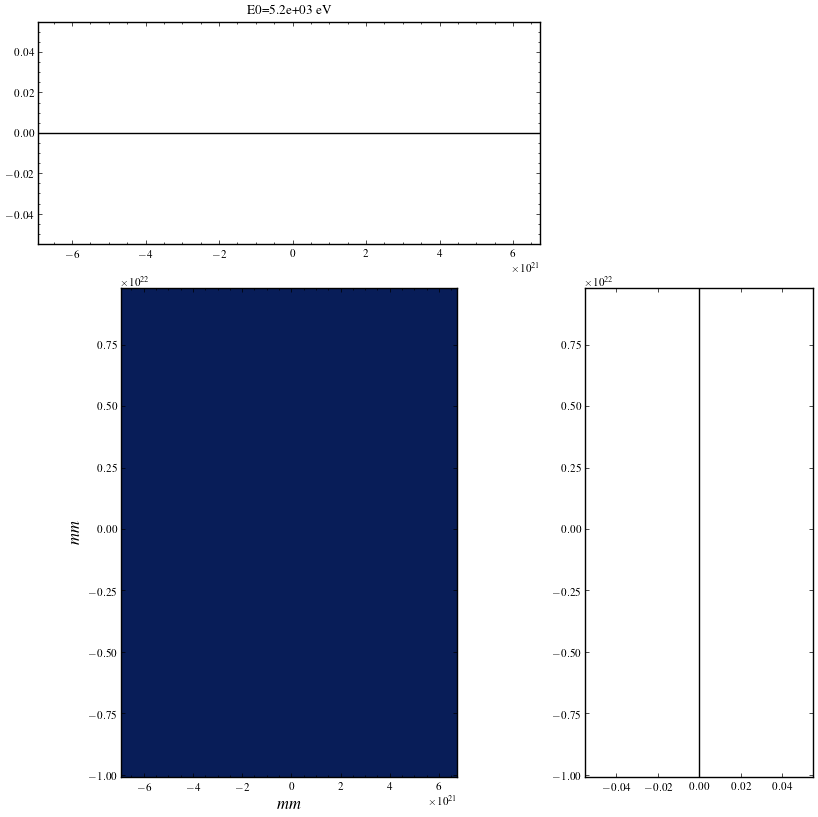

NVE


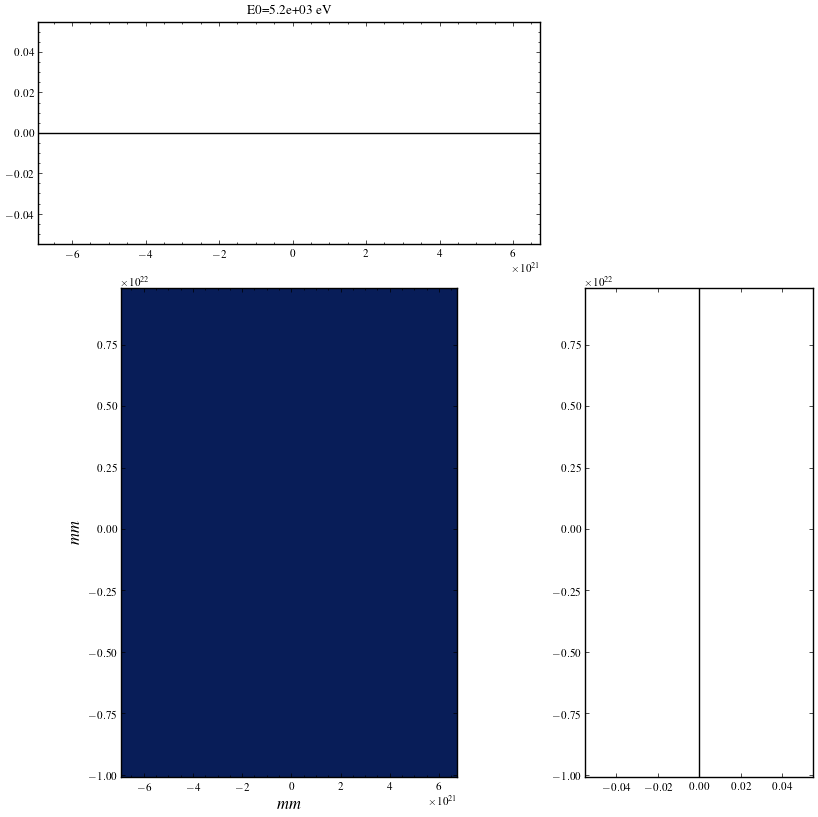

In [9]:
bl.propagate_sequential(wfr)


In [ ]:
ii = wfr.get_intensity()
from matplotlib import pyplot as plt

plt.plot(ii.mean(0).mean(0))
